<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/15_anomaly_detection/isolation_forest_one_class_SVM_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Download

In [18]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 59.7MB/s]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [20]:
df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [21]:
df.describe()

,Mileage,Price
count,908.000000,908.000000
mean,45.869736,77.555036
std,30.598219,19.275677
min,1.398964,20.000000
25%,25.415487,64.435773
50%,34.599453,73.550501
75%,49.862529,88.939217
max,128.604249,141.201890


Text(0, 0.5, 'Price')

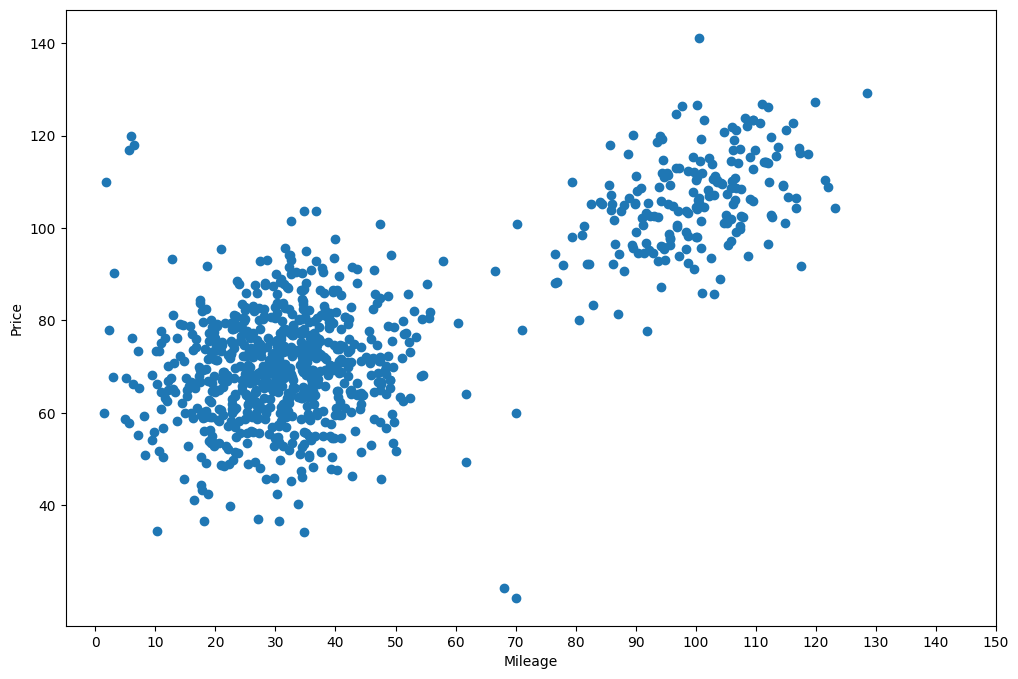

In [22]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')

### Isolation Forest

In [24]:
from sklearn.ensemble import IsolationForest

In [25]:
clf = IsolationForest(random_state=0, contamination = 0.05).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

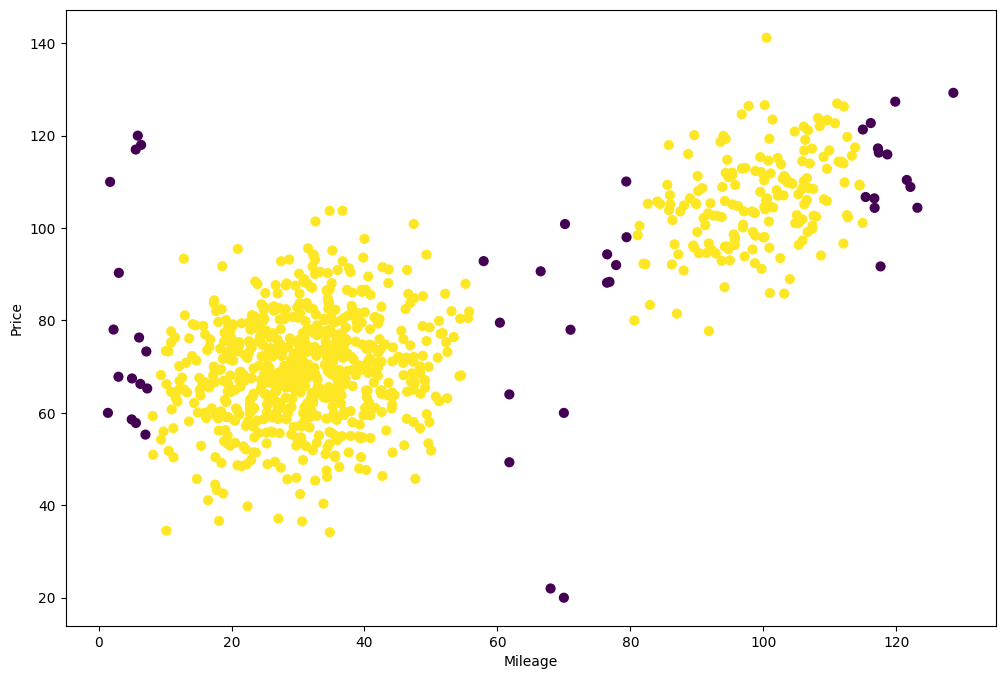

In [26]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


### One Class SVM

In [27]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel = 'rbf', gamma = 0.05, nu = 0.05).fit_predict(df.iloc[:, :2])
df['is_outlier_svm'] = ocsvm

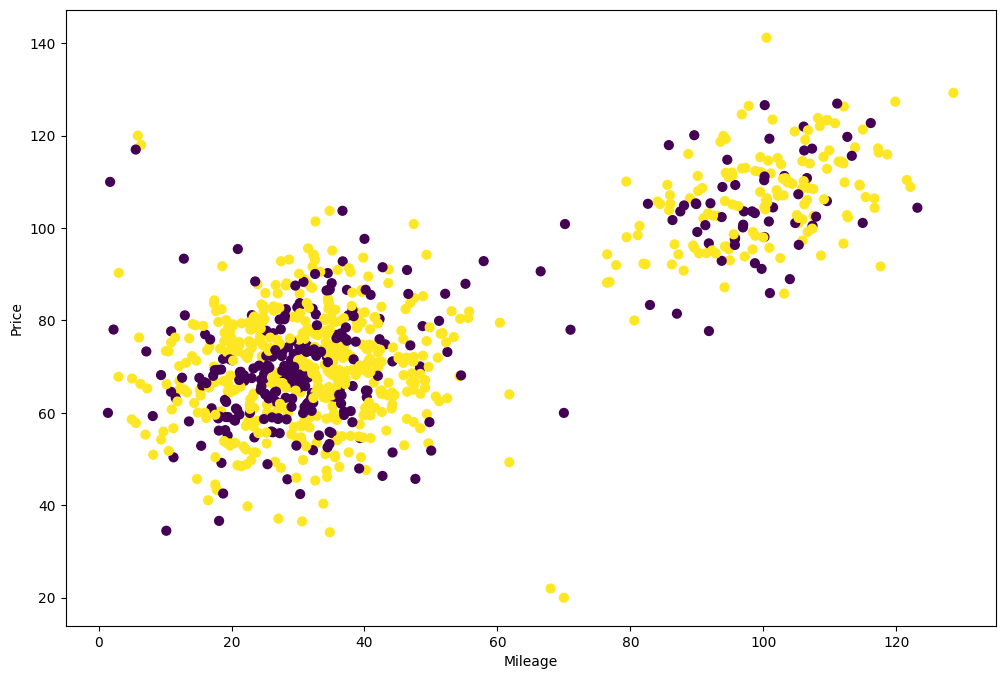

In [28]:
plt.scatter(df['Mileage'], df['Price'], s=40, c=df['is_outlier_svm'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### LOF

In [29]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1).fit_predict(df.iloc[:, :2])
df['is_outlier_lof'] = clf

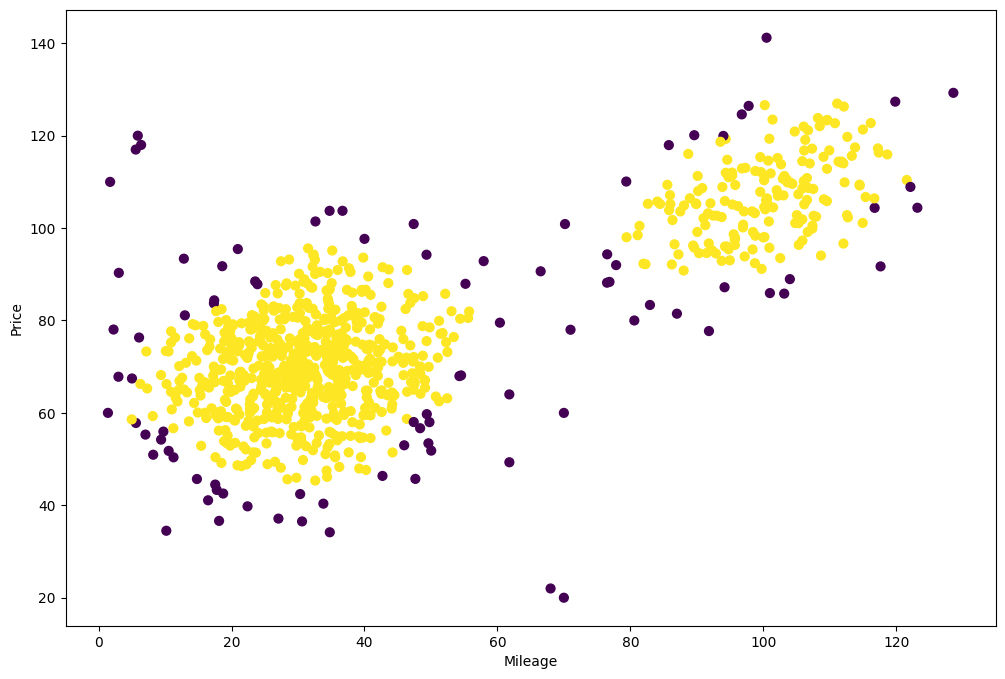

In [30]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()